In [1]:
import pandas 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pandas.read_csv('../data_sets/beta_glu_DMS_log2enrichment.csv')

In [3]:
melted = pandas.melt(df, id_vars=['pos', 'wtAA'])
melted.columns = ('pos', 'wtAA', 'designed', 'enrich')
melted.head()

,pos,wtAA,designed,enrich
0,1,M,A,NaN
1,2,V,A,-0.162
2,3,P,A,-0.800
3,4,A,A,0.002
4,5,A,A,0.002


In [4]:
import numpy as np 

In [5]:
# calculate average at each dot 
alphabet = melted.wtAA.unique()
block = pandas.DataFrame(None, index=alphabet, columns=alphabet)
for idx, row in melted.iterrows():
    if not row.designed == '*':
        original_value = block.loc[row.wtAA, row.designed]
        if np.isnan(original_value):
            new_value = row.enrich 
        else:
            new_value = (row.enrich + original_value)/2 
        block.loc[row.wtAA, row.designed] = new_value
block = block.astype(float)

[<matplotlib.text.Text at 0x10f4d9ba8>, <matplotlib.text.Text at 0x10f4c6dd8>]

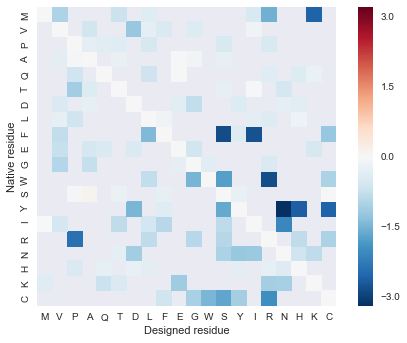

In [6]:
fig, ax = plt.subplots()
sns.heatmap(block, square=True, ax=ax)
ax.set(xlabel='Designed residue', ylabel='Native residue')

In [7]:
# calculate the average frequency of mutation in the data set 
alphabet = melted.wtAA.unique()
freq = pandas.DataFrame(None, index=alphabet, columns=alphabet)
for idx, row in melted.iterrows():
    if not row.designed == '*':
        original_value = freq.loc[row.wtAA, row.designed]
        if np.isnan(original_value):
            new_value = 1  
        else:
            new_value = original_value + 1  
        freq.loc[row.wtAA, row.designed] = new_value
freq = freq.astype(float)

[<matplotlib.text.Text at 0x11314eb38>, <matplotlib.text.Text at 0x1130b0898>]

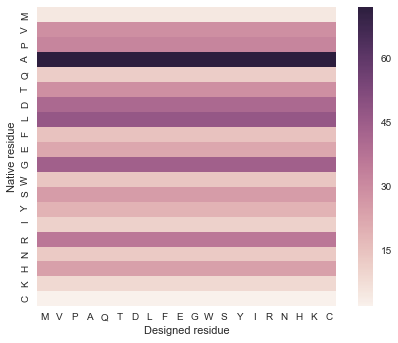

In [8]:
fig, ax = plt.subplots()
sns.heatmap(freq, square=True, ax=ax)
ax.set(xlabel='Designed residue', ylabel='Native residue')

In [15]:
data = []
for n, letter in enumerate(alphabet):
    pkg = (n, letter, len(df[(df.wtAA == letter)])) 
    data.append(pkg) 
    
d = pandas.DataFrame(data, columns=['n', 'letter', 'frequency'])
d

,n,letter,frequency
0,0,M,5
1,1,V,29
2,2,P,32
3,3,A,72
4,4,Q,12
5,5,T,29
6,6,D,41
7,7,L,47
8,8,F,15
9,9,E,22


/Users/alex/anaconda3/envs/rose/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


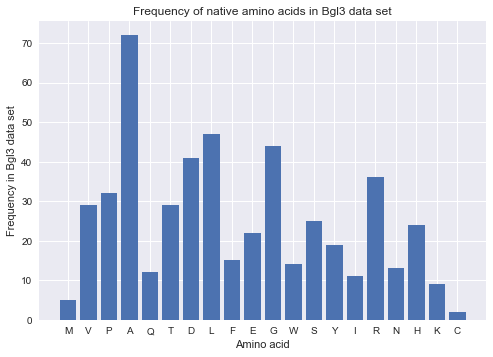

In [23]:
fig, ax = plt.subplots()
ax.bar(d.n, d.frequency)
ax.set_xticks(d.n)
ax.set_xticklabels(d.letter)
ax.set(title='Frequency of native amino acids in Bgl3 data set', xlabel='Amino acid', ylabel='Frequency in Bgl3 data set')
fig.show()